<span style="font-family:Cambria; color:#c27767">
Optional: install if required
</span>

In [1]:
# Uncomment if required
# !pip install pandas --quiet

<span style="font-family:Cambria; color:#c27767">
Required packages:
</span>

In [2]:
# Standard library imports
import sys

# Third party imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from geopy.geocoders import Nominatim

import folium

# Local application/library specific imports
sys.path.append('functions')

from find_lat_long import find_lat_long
from find_state import find_state
from prepare_rain_data import prepare_rain_data

<span style="font-family:Cambria; color:#c27767">
Run below to lines for readability and style options:
</span>

In [3]:
# Pandas - run to display Data Frames properly

# To limit displayed rows
pd.options.display.max_rows = 50

#  To show all columns

pd.options.display.max_columns = 100

# To round floating numbers
pd.options.display.float_format = '{:,.2f}'.format
# To unset rounding float numbers
# pd.set_option("display.float_format", None)

<span style="font-family:Cambria; color:#c27767">

# 1. Import clean data
</span>

<span style="font-family:Cambria">
To run EDA I will not transform wind direction and location for now.
</span>

In [4]:
# run the custom function to load clean data
rain_data_clean = prepare_rain_data(
    wind_direction_transformation = False, 
    location_transformation = False
)

In [5]:
rain_data_clean

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,State
0,2007-11-01,Albury Airport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,New South Wales
1,2007-11-01,Badgerys Creek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,New South Wales
2,2007-11-01,Cobar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,New South Wales
3,2007-11-01,Coffs Harbour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,New South Wales
4,2007-11-01,Moree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,New South Wales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172720,2017-06-25,Launceston,1.80,12.80,0.00,NaN,NaN,NW,50.00,NNW,NNW,15.00,17.00,84.00,73.00,NaN,NaN,8.00,8.00,9.40,12.40,False,False,Tasmania
172721,2017-06-25,Alice Springs,9.60,NaN,0.00,NaN,NaN,NaN,NaN,WSW,E,6.00,17.00,36.00,19.00,"1,021.40","1,017.50",1.00,1.00,15.60,26.30,False,<NA>,Northern Territory
172722,2017-06-25,Darwin,19.30,NaN,0.00,5.00,NaN,NaN,NaN,E,NNW,13.00,17.00,68.00,45.00,"1,013.90","1,010.70",6.00,1.00,24.60,29.00,False,<NA>,Northern Territory
172723,2017-06-25,Katherine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,9.00,17.00,NaN,NaN,"1,014.90","1,011.70",NaN,NaN,NaN,NaN,<NA>,<NA>,Northern Territory


<span style="font-family:Cambria; color:#c27767">

# 2. Exploratory data analysis
</span>

<span style="font-family:Cambria">
I will try to examine all data columns - whatever catches my interest.
</span>

<span style="font-family:Cambria; color:#c27767">

## 1. Temperature
</span>

<span style="font-family:Cambria">
There are 4 variables related to temperature - min, max, 9 AM and 3 PM temperature each day for 49 different locations. I also have 10 years of data, therefore it might be difficult to plot every locations through years and see meaningful data.

I will investigate statistical variables: mean and quartiles.
</span>

In [6]:
# add detailed date columns - year, month
rain_data_clean['Year'] = rain_data_clean['Date'].dt.strftime('%Y')
rain_data_clean['Month'] = rain_data_clean['Date'].dt.strftime('%m')

Then I will plot temperatures for every location in different states in a different plot to see them all together. This will help to visualise how weather in different parts of Australia looks like.

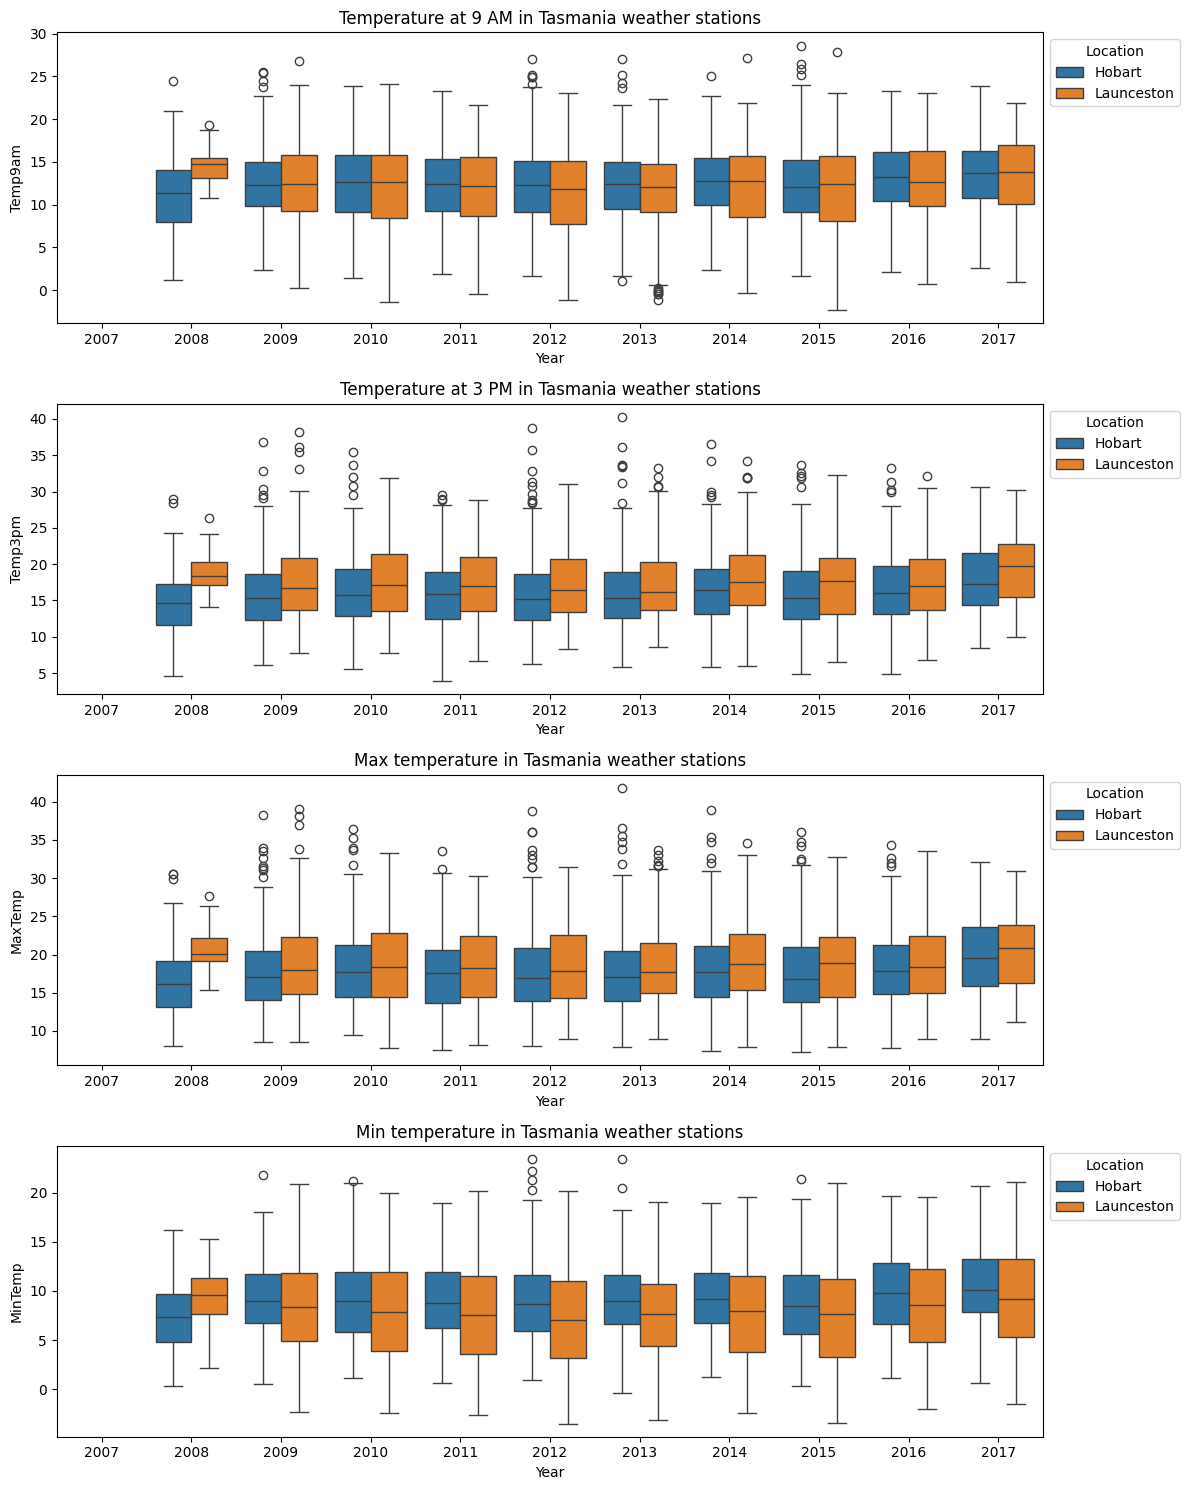

In [7]:
# temperature data for Tasmania weather stations
tasmania_data = rain_data_clean.query("State == 'Tasmania'")

# create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 15))

sns.boxplot(data=tasmania_data, x='Year', y='Temp9am', hue = 'Location', ax=axes[0])
axes[0].set_title("Temperature at 9 AM in Tasmania weather stations")
sns.move_legend(axes[0], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=tasmania_data, x='Year', y='Temp3pm', hue = 'Location', ax=axes[1])
axes[1].set_title("Temperature at 3 PM in Tasmania weather stations")
sns.move_legend(axes[1], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=tasmania_data, x='Year', y='MaxTemp', hue = 'Location', ax=axes[2])
axes[2].set_title("Max temperature in Tasmania weather stations")
sns.move_legend(axes[2], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=tasmania_data, x='Year', y='MinTemp', hue = 'Location', ax=axes[3])
axes[3].set_title("Min temperature in Tasmania weather stations")
sns.move_legend(axes[3], "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()  # Avoid overlap

plt.show()

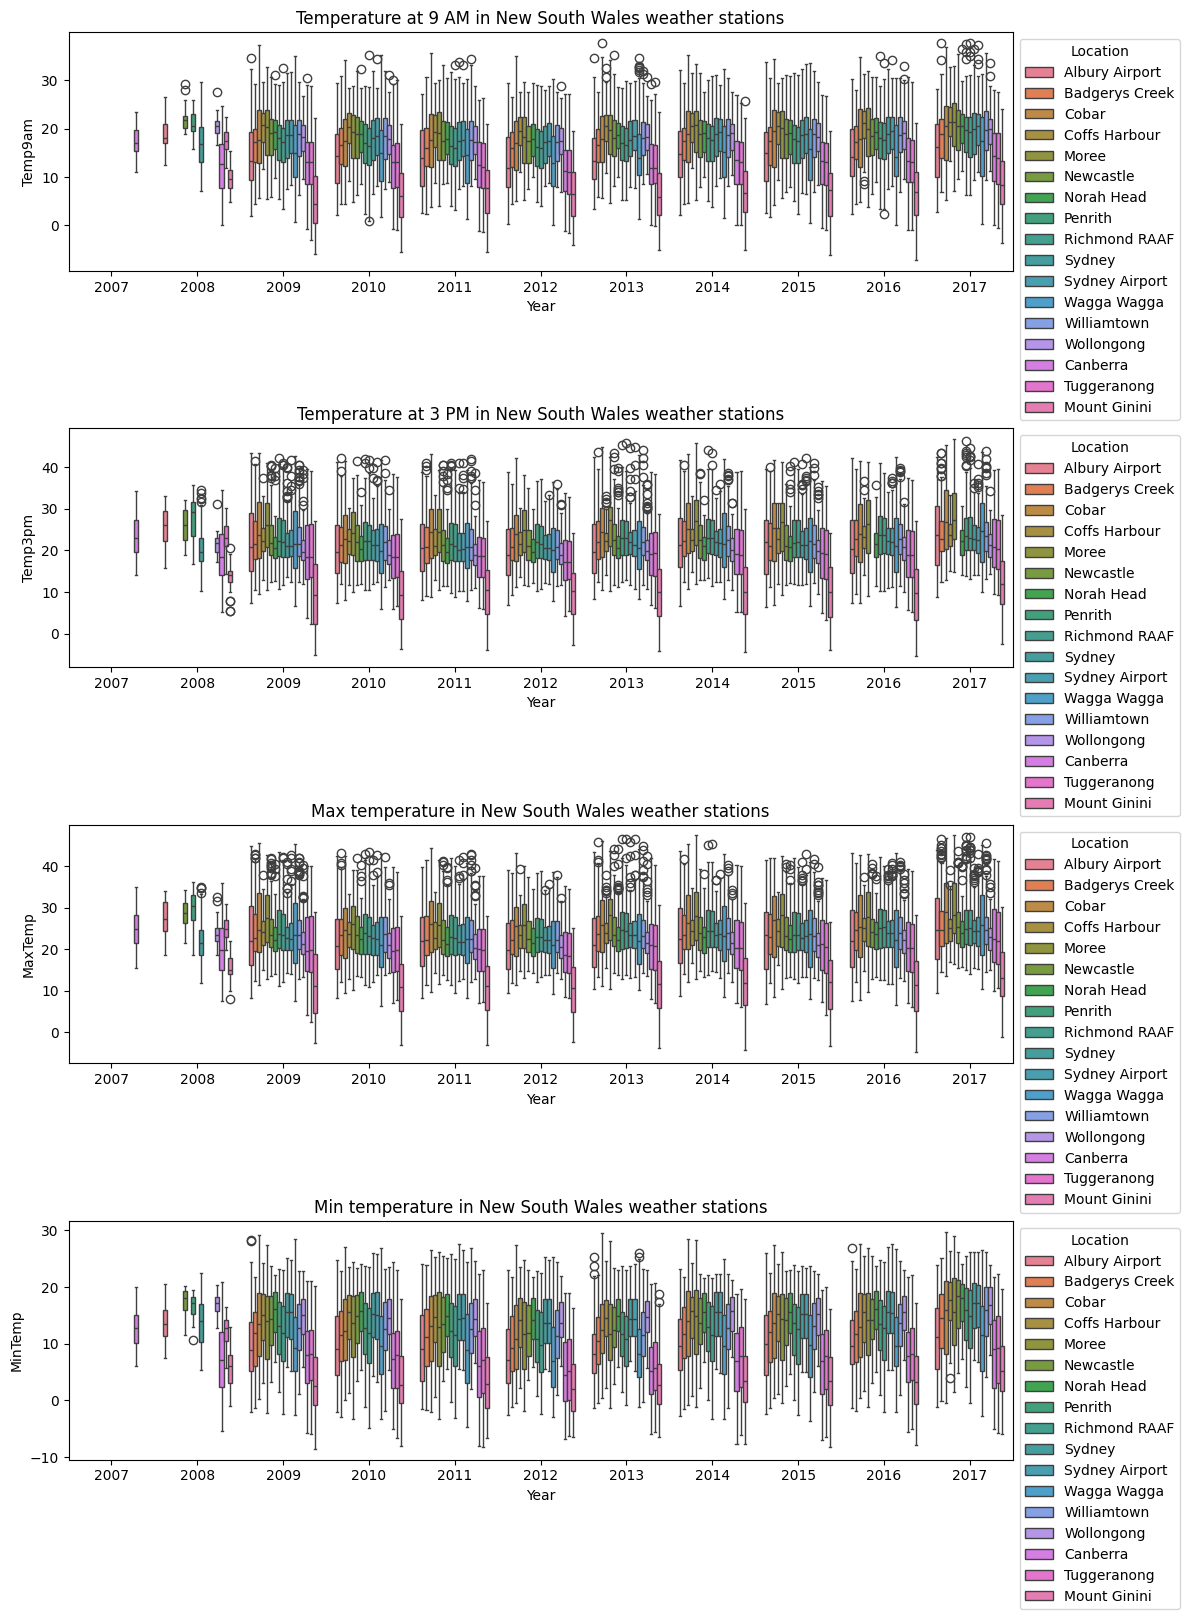

In [8]:
# temperature data for New South Wales weather stations
new_south_wales_data = rain_data_clean.query("State == 'New South Wales'")

# create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 16))

sns.boxplot(data=new_south_wales_data, x='Year', y='Temp9am', hue = 'Location', ax=axes[0])
axes[0].set_title("Temperature at 9 AM in New South Wales weather stations")
sns.move_legend(axes[0], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=new_south_wales_data, x='Year', y='Temp3pm', hue = 'Location', ax=axes[1])
axes[1].set_title("Temperature at 3 PM in New South Wales weather stations")
sns.move_legend(axes[1], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=new_south_wales_data, x='Year', y='MaxTemp', hue = 'Location', ax=axes[2])
axes[2].set_title("Max temperature in New South Wales weather stations")
sns.move_legend(axes[2], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=new_south_wales_data, x='Year', y='MinTemp', hue = 'Location', ax=axes[3])
axes[3].set_title("Min temperature in New South Wales weather stations")
sns.move_legend(axes[3], "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()  # Avoid overlap

plt.show()

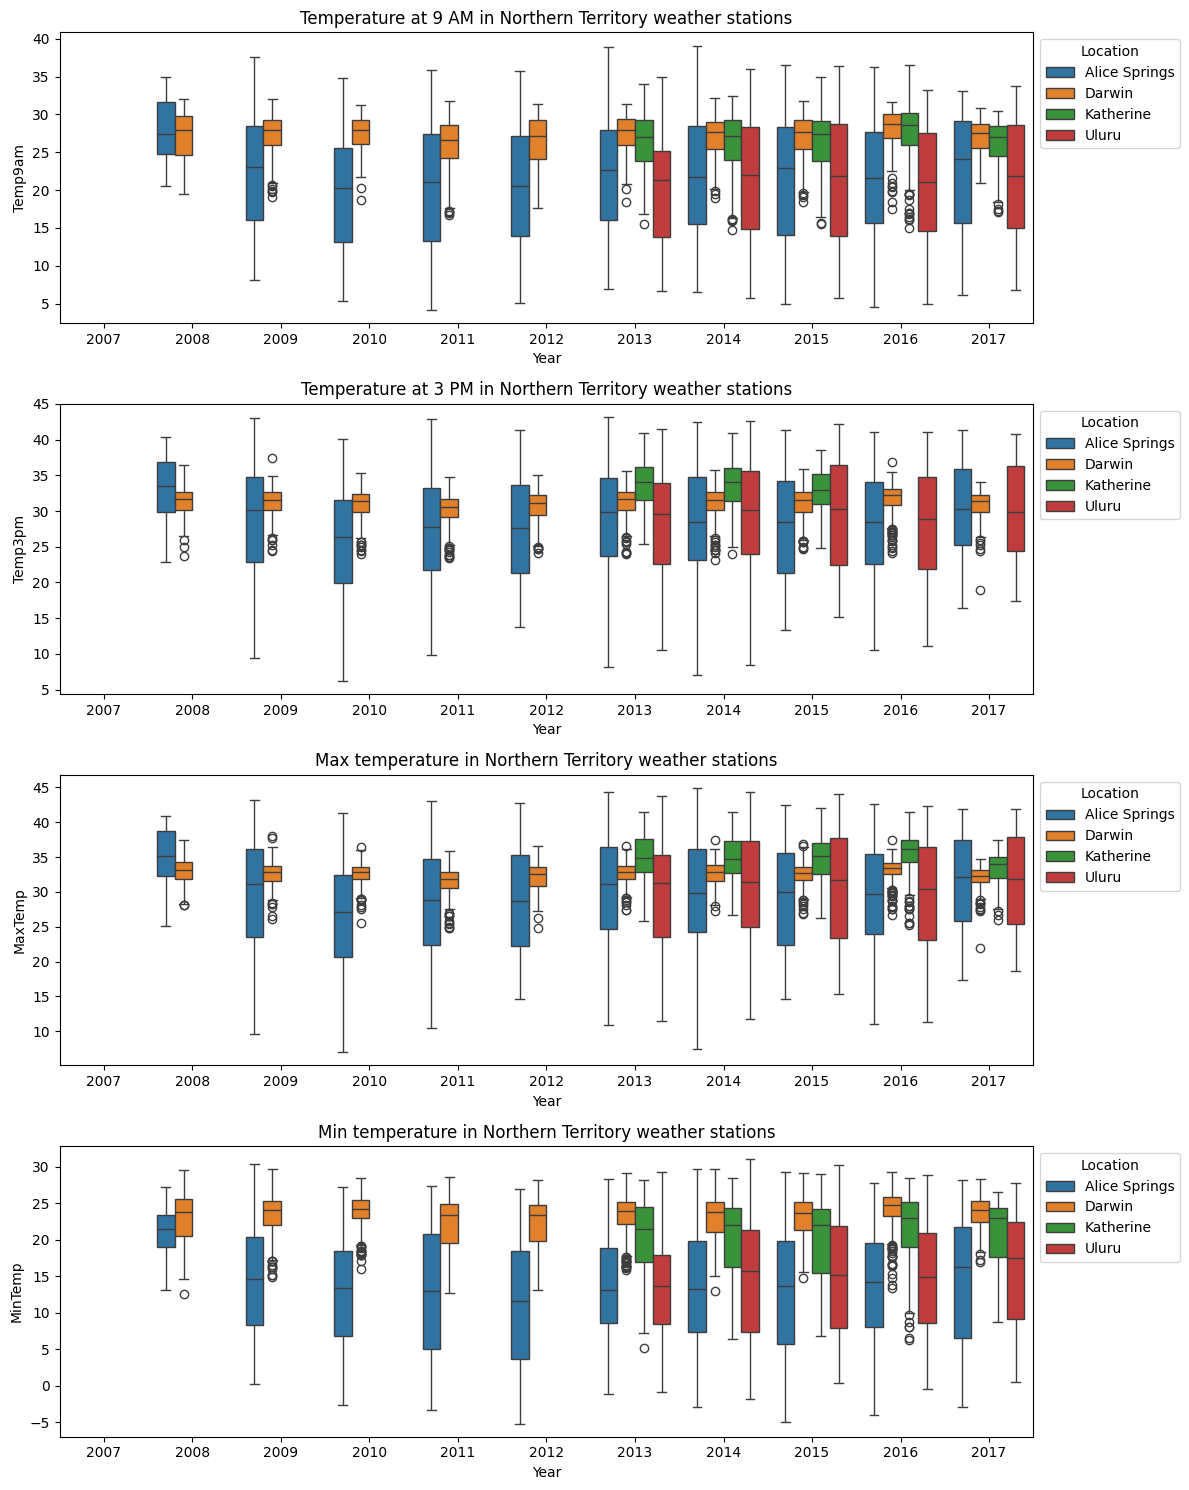

In [9]:
# temperature data for Northern Territory weather stations
northern_territory_data = rain_data_clean.query("State == 'Northern Territory'")

# create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 15))

sns.boxplot(data=northern_territory_data, x='Year', y='Temp9am', hue = 'Location', ax=axes[0])
axes[0].set_title("Temperature at 9 AM in Northern Territory weather stations")
sns.move_legend(axes[0], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=northern_territory_data, x='Year', y='Temp3pm', hue = 'Location', ax=axes[1])
axes[1].set_title("Temperature at 3 PM in Northern Territory weather stations")
sns.move_legend(axes[1], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=northern_territory_data, x='Year', y='MaxTemp', hue = 'Location', ax=axes[2])
axes[2].set_title("Max temperature in Northern Territory weather stations")
sns.move_legend(axes[2], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=northern_territory_data, x='Year', y='MinTemp', hue = 'Location', ax=axes[3])
axes[3].set_title("Min temperature in Northern Territory weather stations")
sns.move_legend(axes[3], "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()  # Avoid overlap

plt.show()

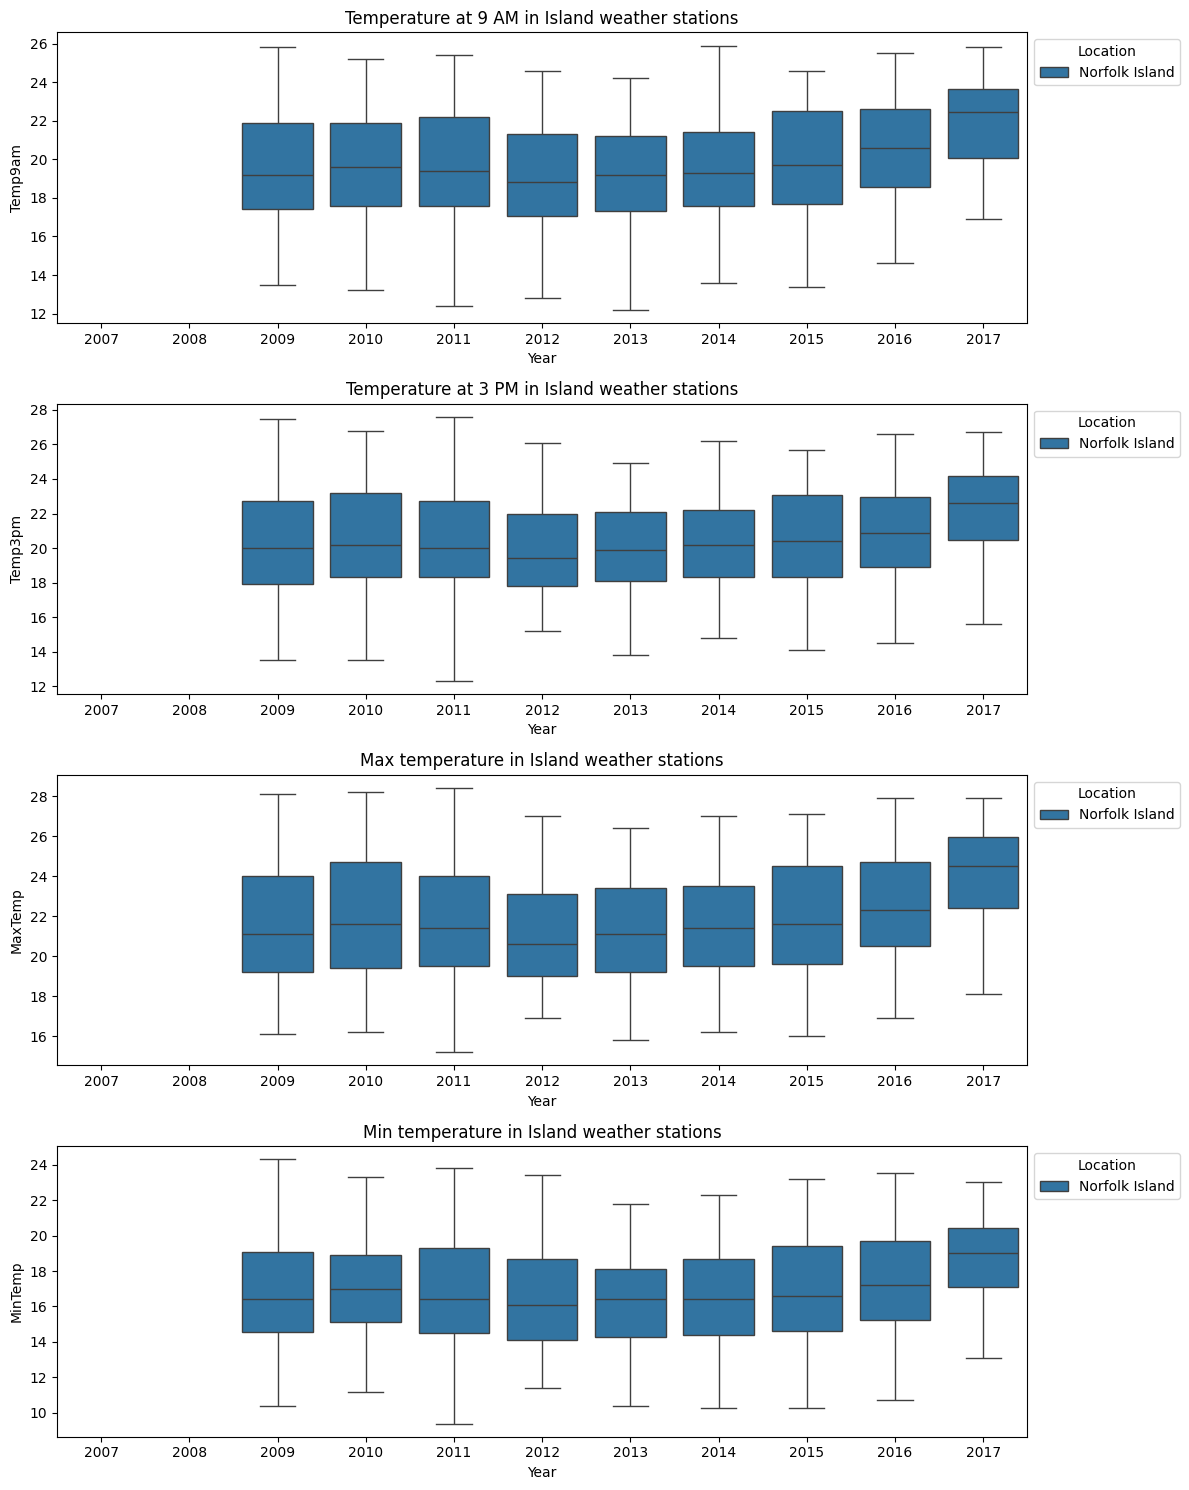

In [10]:
# temperature data for Island weather station
island_data = rain_data_clean.query("State == 'Island'")

# create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 15))

sns.boxplot(data=island_data, x='Year', y='Temp9am', hue = 'Location', ax=axes[0])
axes[0].set_title("Temperature at 9 AM in Island weather stations")
sns.move_legend(axes[0], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=island_data, x='Year', y='Temp3pm', hue = 'Location', ax=axes[1])
axes[1].set_title("Temperature at 3 PM in Island weather stations")
sns.move_legend(axes[1], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=island_data, x='Year', y='MaxTemp', hue = 'Location', ax=axes[2])
axes[2].set_title("Max temperature in Island weather stations")
sns.move_legend(axes[2], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=island_data, x='Year', y='MinTemp', hue = 'Location', ax=axes[3])
axes[3].set_title("Min temperature in Island weather stations")
sns.move_legend(axes[3], "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()  # Avoid overlap

plt.show()

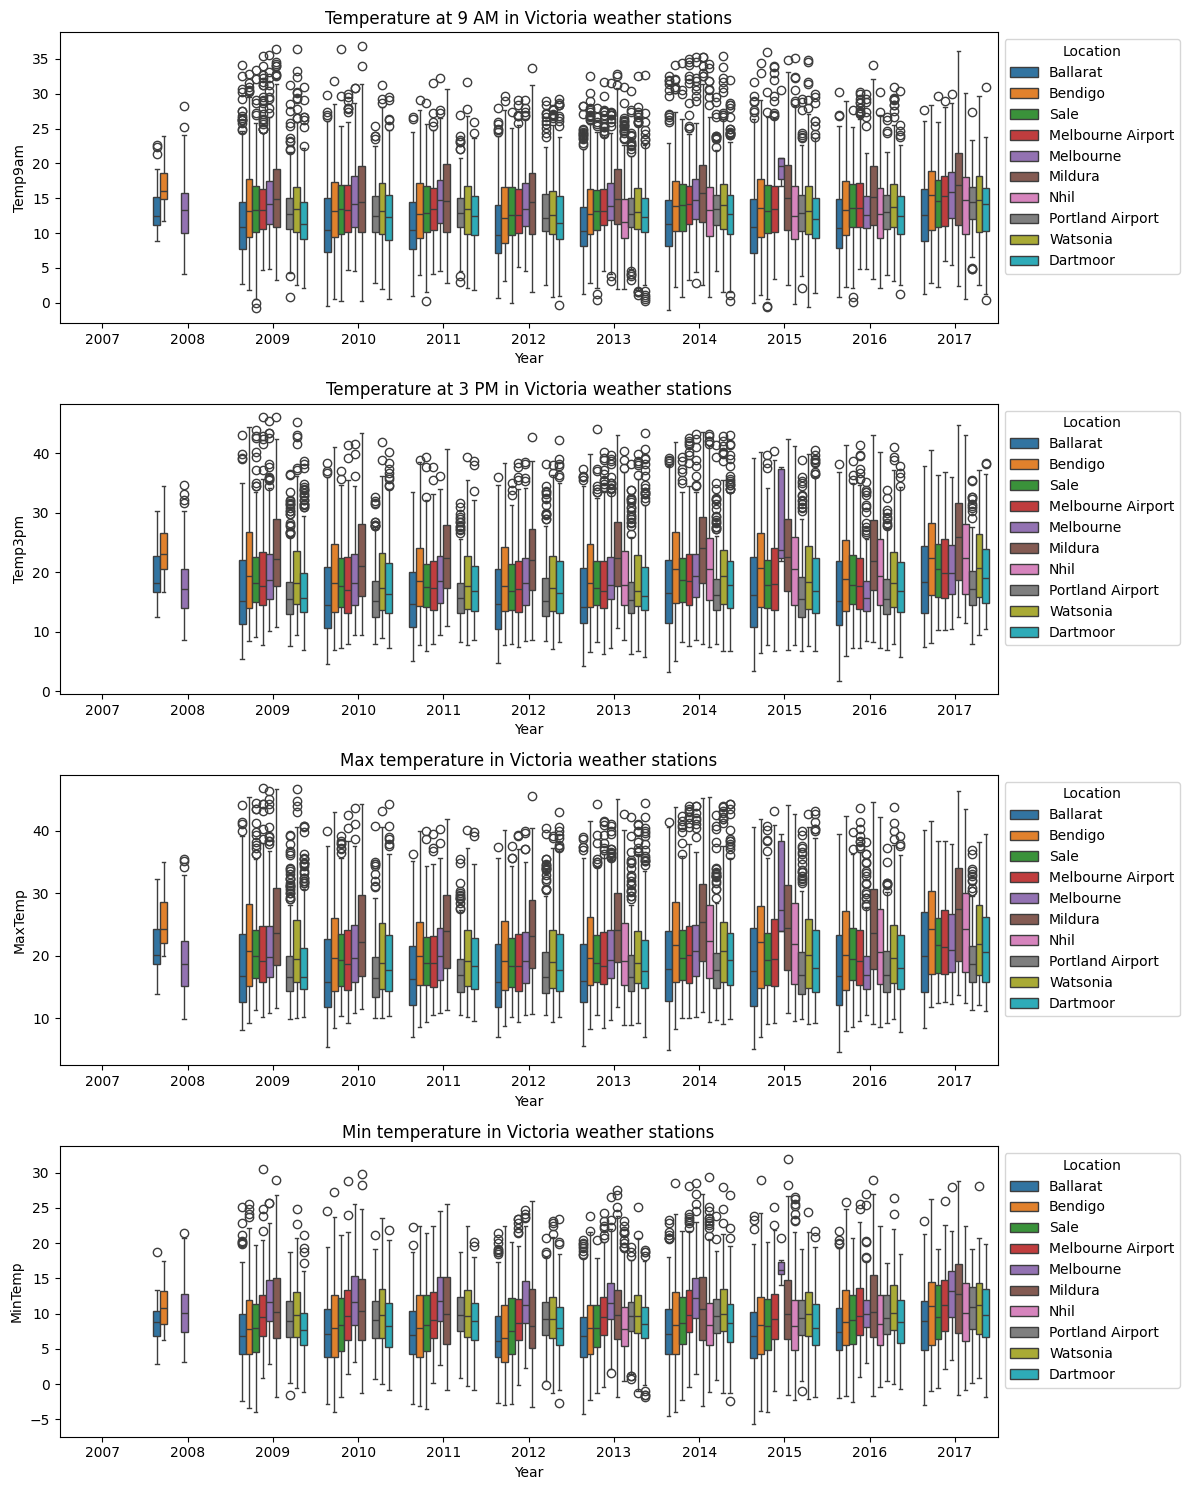

In [11]:
# temperature data for Victoria weather station
victoria_data = rain_data_clean.query("State == 'Victoria'")

# create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 15))

sns.boxplot(data=victoria_data, x='Year', y='Temp9am', hue = 'Location', ax=axes[0])
axes[0].set_title("Temperature at 9 AM in Victoria weather stations")
sns.move_legend(axes[0], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=victoria_data, x='Year', y='Temp3pm', hue = 'Location', ax=axes[1])
axes[1].set_title("Temperature at 3 PM in Victoria weather stations")
sns.move_legend(axes[1], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=victoria_data, x='Year', y='MaxTemp', hue = 'Location', ax=axes[2])
axes[2].set_title("Max temperature in Victoria weather stations")
sns.move_legend(axes[2], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=victoria_data, x='Year', y='MinTemp', hue = 'Location', ax=axes[3])
axes[3].set_title("Min temperature in Victoria weather stations")
sns.move_legend(axes[3], "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()  # Avoid overlap

plt.show()

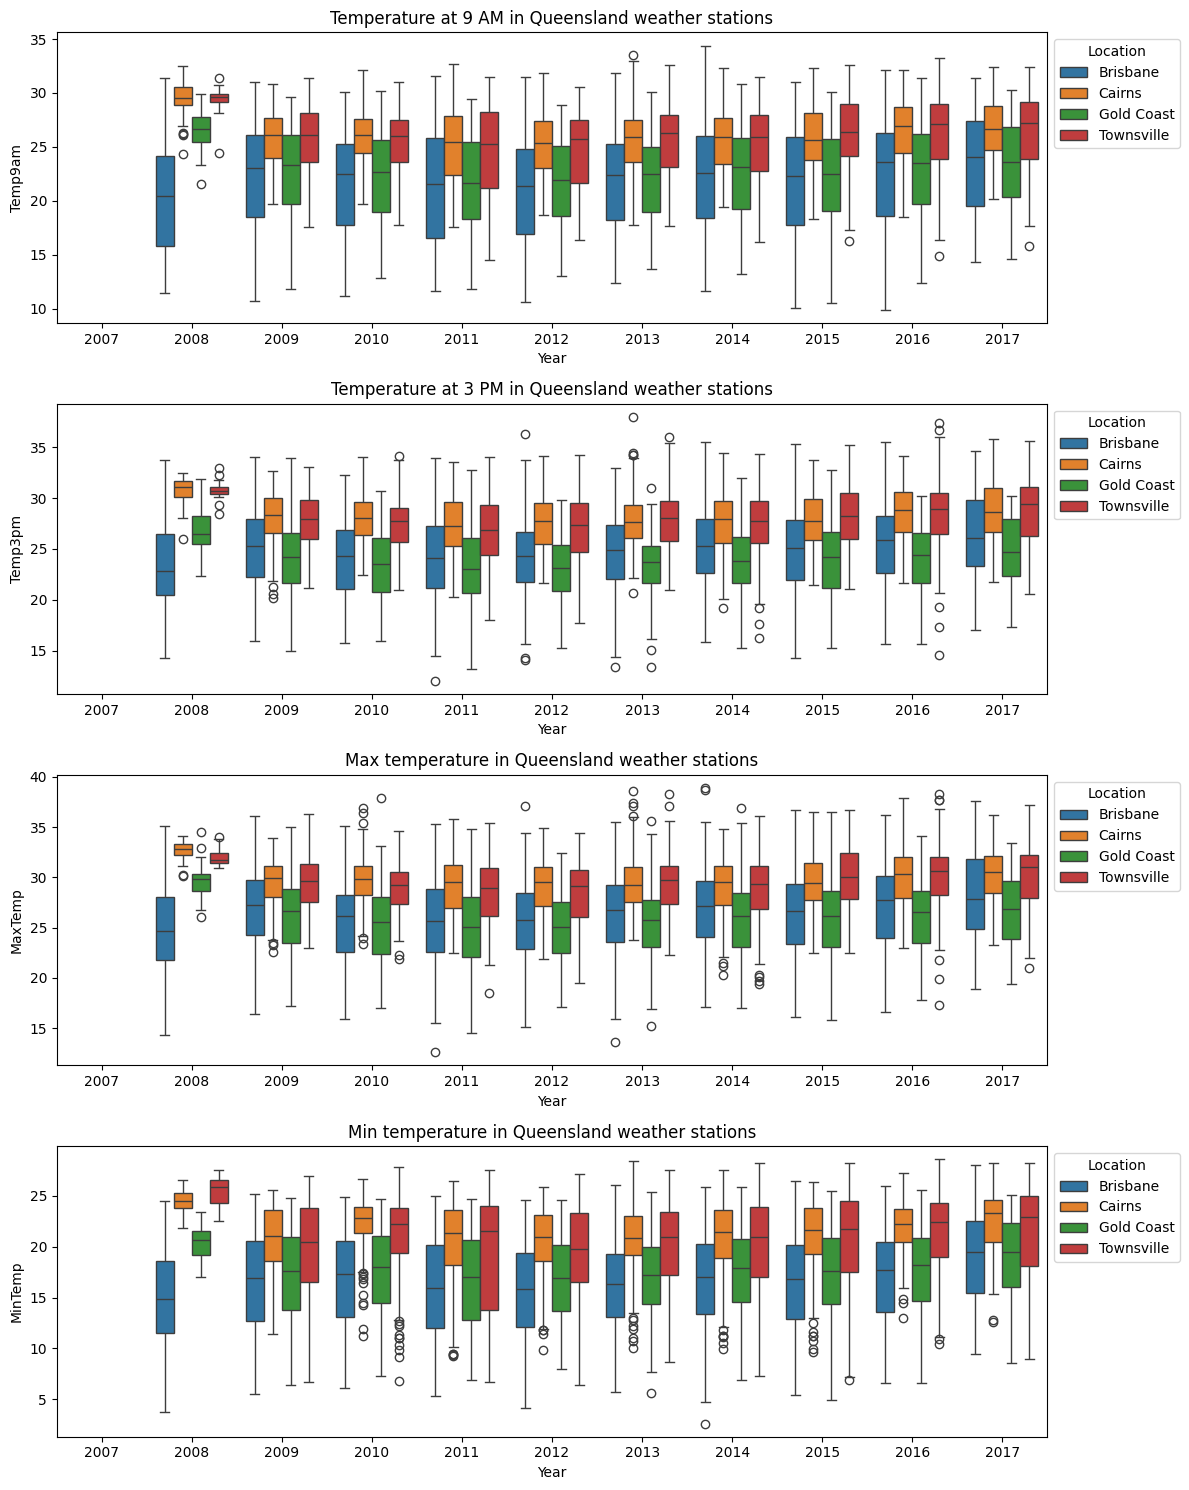

In [12]:
# temperature data for Queensland weather station
queensland_data = rain_data_clean.query("State == 'Queensland'")

# create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 15))

sns.boxplot(data=queensland_data, x='Year', y='Temp9am', hue = 'Location', ax=axes[0])
axes[0].set_title("Temperature at 9 AM in Queensland weather stations")
sns.move_legend(axes[0], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=queensland_data, x='Year', y='Temp3pm', hue = 'Location', ax=axes[1])
axes[1].set_title("Temperature at 3 PM in Queensland weather stations")
sns.move_legend(axes[1], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=queensland_data, x='Year', y='MaxTemp', hue = 'Location', ax=axes[2])
axes[2].set_title("Max temperature in Queensland weather stations")
sns.move_legend(axes[2], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=queensland_data, x='Year', y='MinTemp', hue = 'Location', ax=axes[3])
axes[3].set_title("Min temperature in Queensland weather stations")
sns.move_legend(axes[3], "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()  # Avoid overlap

plt.show()

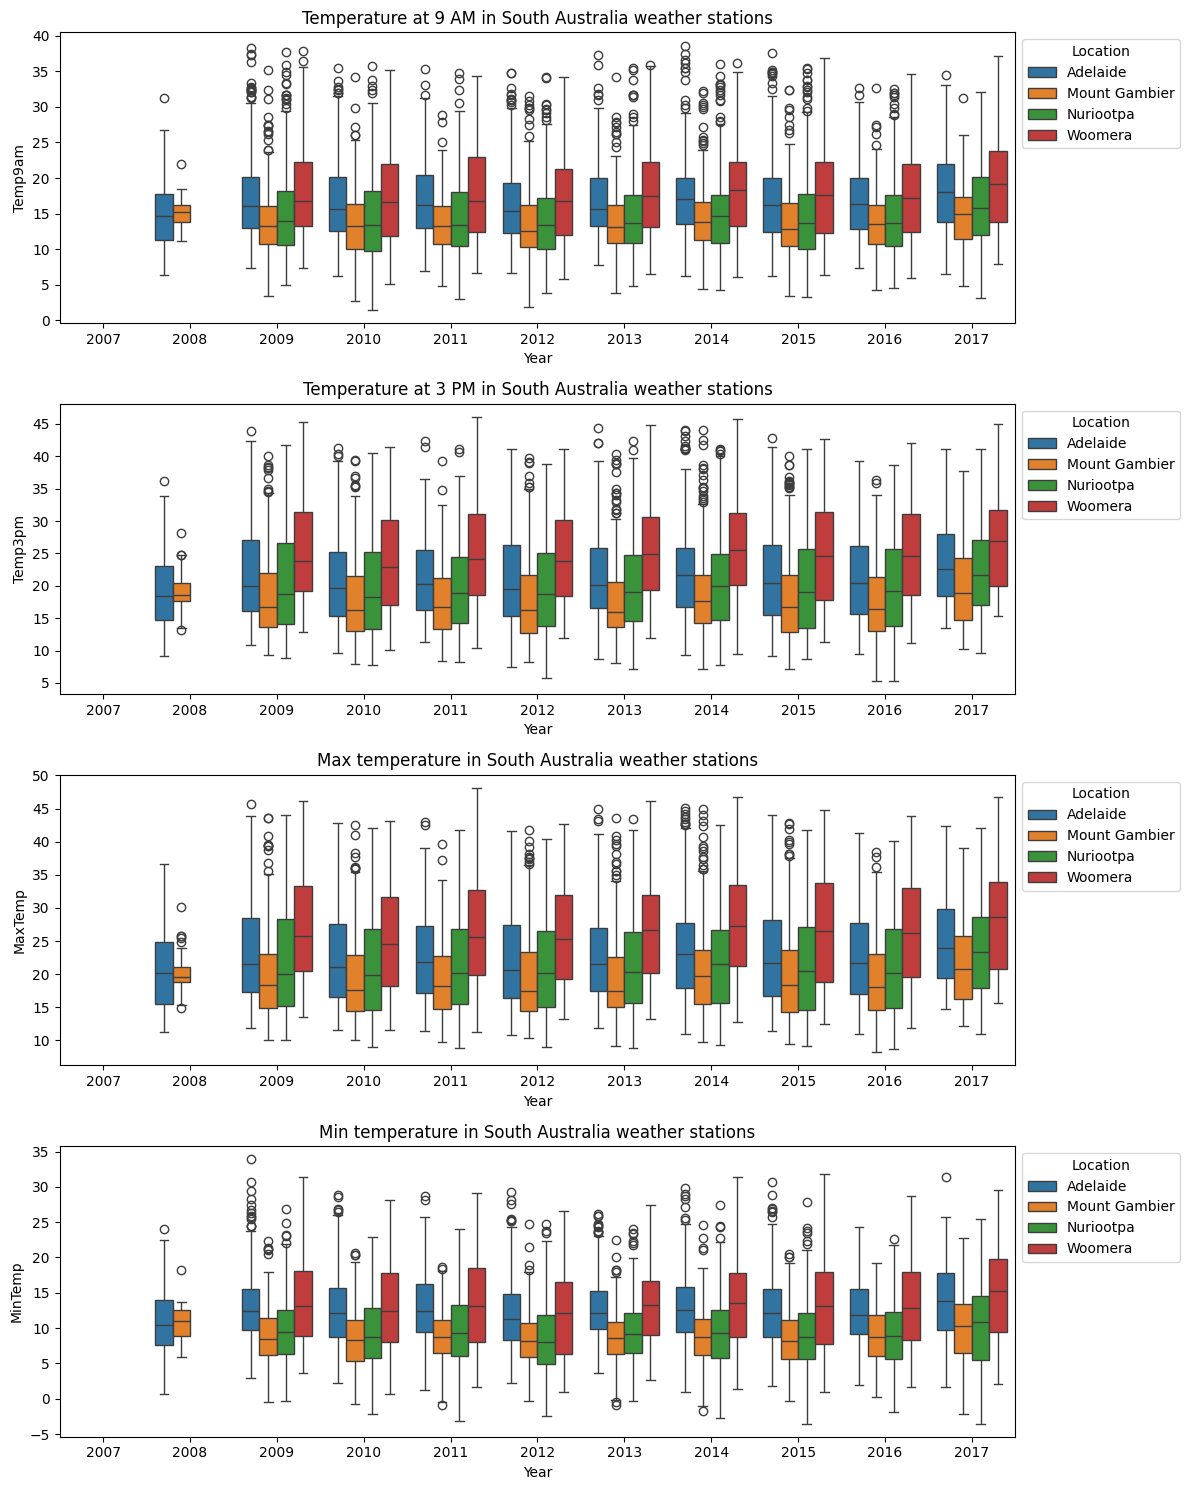

In [13]:
# temperature data for South Australia weather station
south_australia_data = rain_data_clean.query("State == 'South Australia'")

# create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 15))

sns.boxplot(data=south_australia_data, x='Year', y='Temp9am', hue = 'Location', ax=axes[0])
axes[0].set_title("Temperature at 9 AM in South Australia weather stations")
sns.move_legend(axes[0], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=south_australia_data, x='Year', y='Temp3pm', hue = 'Location', ax=axes[1])
axes[1].set_title("Temperature at 3 PM in South Australia weather stations")
sns.move_legend(axes[1], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=south_australia_data, x='Year', y='MaxTemp', hue = 'Location', ax=axes[2])
axes[2].set_title("Max temperature in South Australia weather stations")
sns.move_legend(axes[2], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=south_australia_data, x='Year', y='MinTemp', hue = 'Location', ax=axes[3])
axes[3].set_title("Min temperature in South Australia weather stations")
sns.move_legend(axes[3], "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()  # Avoid overlap

plt.show()

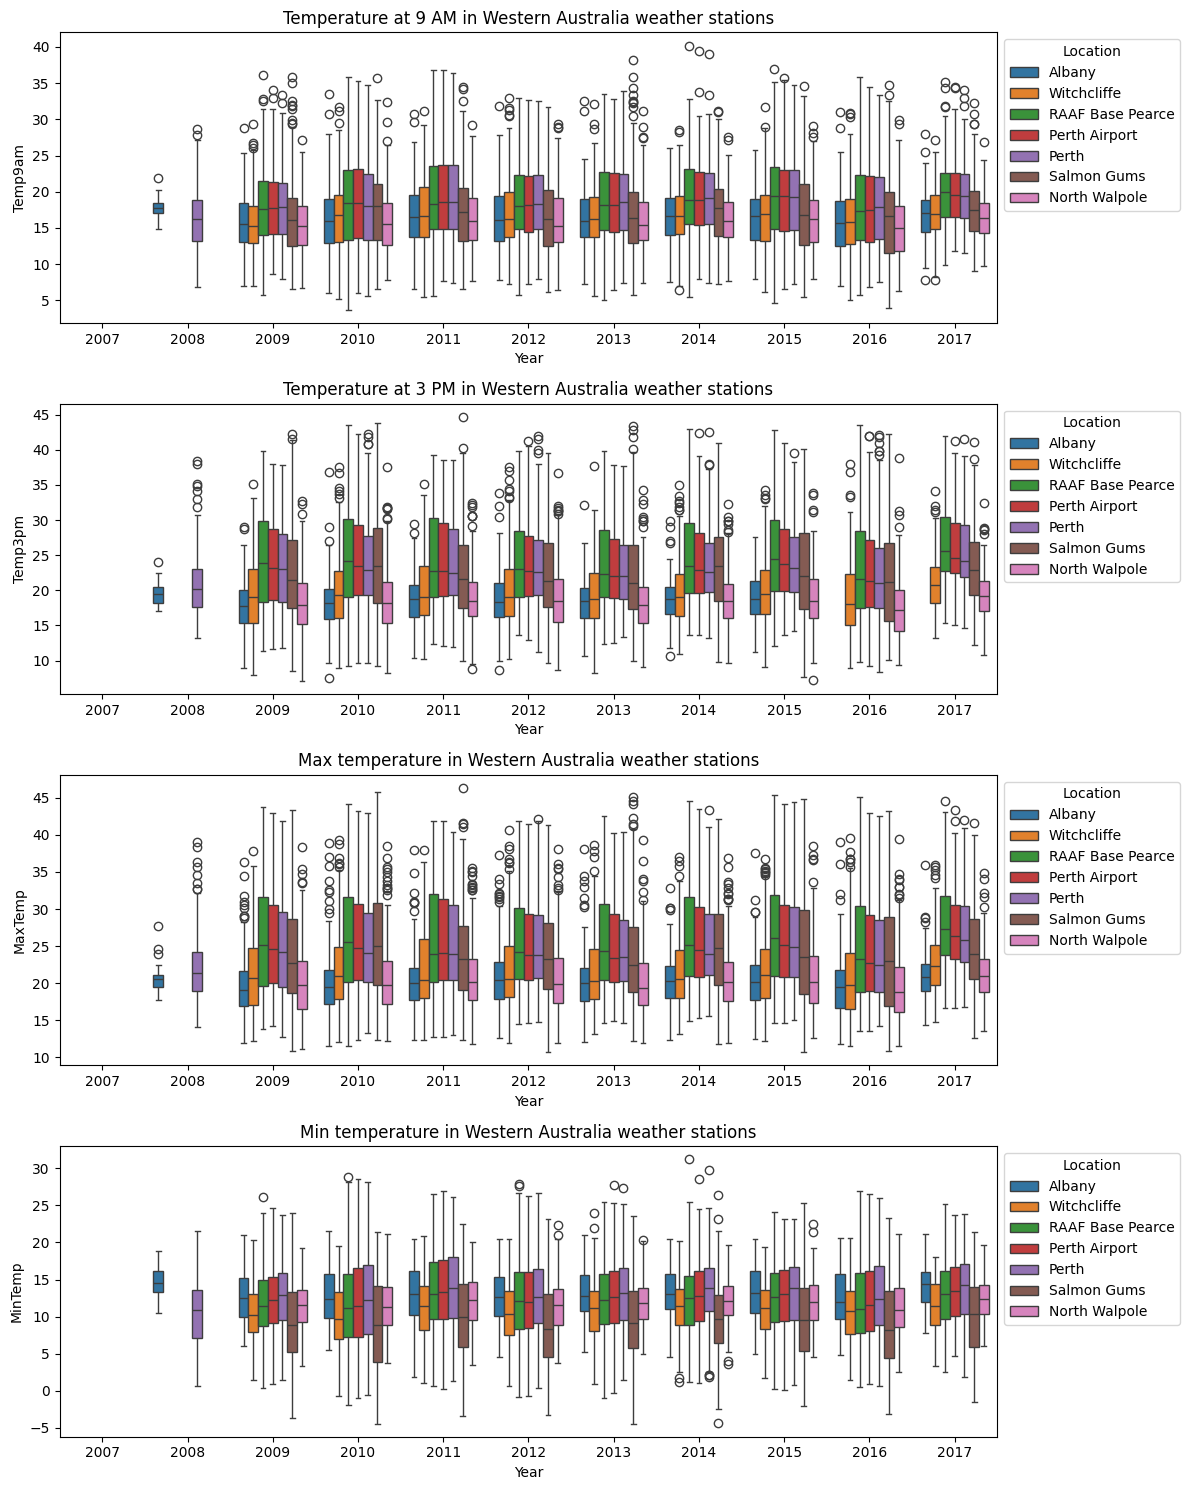

In [14]:
# temperature data for South Australia weather station
western_australia_data = rain_data_clean.query("State == 'Western Australia'")

# create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 15))

sns.boxplot(data=western_australia_data, x='Year', y='Temp9am', hue = 'Location', ax=axes[0])
axes[0].set_title("Temperature at 9 AM in Western Australia weather stations")
sns.move_legend(axes[0], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=western_australia_data, x='Year', y='Temp3pm', hue = 'Location', ax=axes[1])
axes[1].set_title("Temperature at 3 PM in Western Australia weather stations")
sns.move_legend(axes[1], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=western_australia_data, x='Year', y='MaxTemp', hue = 'Location', ax=axes[2])
axes[2].set_title("Max temperature in Western Australia weather stations")
sns.move_legend(axes[2], "upper left", bbox_to_anchor=(1, 1))

sns.boxplot(data=western_australia_data, x='Year', y='MinTemp', hue = 'Location', ax=axes[3])
axes[3].set_title("Min temperature in Western Australia weather stations")
sns.move_legend(axes[3], "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()  # Avoid overlap

plt.show()

I will now investigate how many temperature records are missing on 2007 and 2008, as it seems records these years are either missing, or very different than trends seen in other years.

In [39]:
# count all records that we hold for all years for temperature data
missing_temp_data_counts = rain_data_clean[["Year", "Month", "MinTemp", "MaxTemp", "Temp9am", "Temp3pm"]].groupby(['Year']).count()

In [35]:
missing_temp_data_counts

,Month,MinTemp,MaxTemp,Temp9am,Temp3pm
Year,,,,,
2007,2989,61,61,61,61
2008,17934,2259,2262,2251,2254
2009,17885,16582,16631,16556,16524
2010,17885,16581,16638,16515,16550
2011,17885,15337,15361,15231,15271
2012,17934,15350,15362,15230,15253
2013,17885,16345,16362,16294,16334
2014,17885,17767,17807,17775,17793
2015,17885,17469,17474,17482,17032


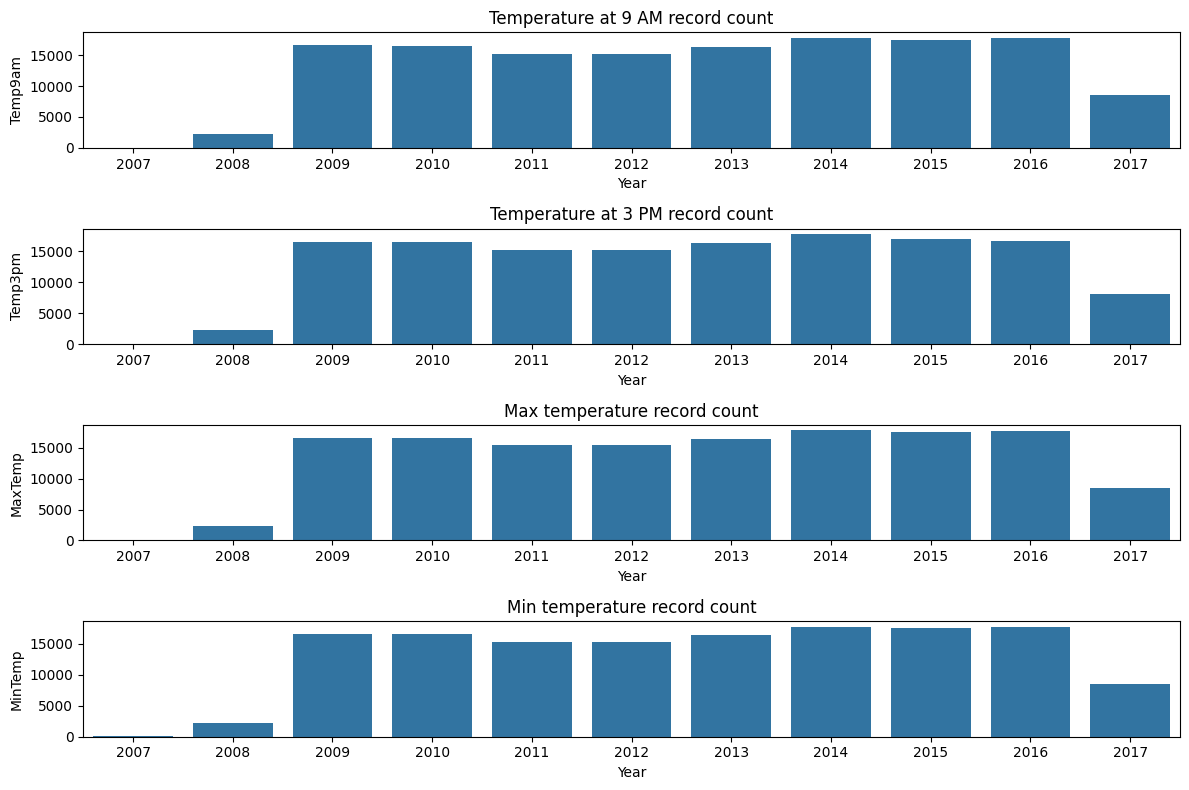

In [51]:
# create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 8))

sns.barplot(data=missing_temp_data_counts, x='Year', y='Temp9am', ax=axes[0])
axes[0].set_title("Temperature at 9 AM record count")

sns.barplot(data=missing_temp_data_counts, x='Year', y='Temp3pm', ax=axes[1])
axes[1].set_title("Temperature at 3 PM record count")

sns.barplot(data=missing_temp_data_counts, x='Year', y='MaxTemp', ax=axes[2])
axes[2].set_title("Max temperature record count")

sns.barplot(data=missing_temp_data_counts, x='Year', y='MinTemp', ax=axes[3])
axes[3].set_title("Min temperature record count")

plt.tight_layout()  # Avoid overlap

plt.show()

I will check how does months look like. Maybe we have data from June onwards, or is it missing for whole year?

In [48]:
# checking 2007 temperature data by month
missing_temp_by_month_2007 = rain_data_clean[["Year", "Month", "MinTemp", "MaxTemp", "Temp9am", "Temp3pm"]].query("Year == '2007'").groupby(['Month']).count()

In [49]:
# checking 2008 temperature data by month
missing_temp_by_month_2008 = rain_data_clean[["Year", "Month", "MinTemp", "MaxTemp", "Temp9am", "Temp3pm"]].query("Year == '2008'").groupby(['Month']).count()

In [50]:
# checking 2009 temperature data by month (to compare)
missing_temp_by_month_2009 = rain_data_clean[["Year", "Month", "MinTemp", "MaxTemp", "Temp9am", "Temp3pm"]].query("Year == '2009'").groupby(['Month']).count()

I will visualise the findings above to get a better understanding how does 2008 and 2007 records look like, and compare them to 2009 data, which looks OK.

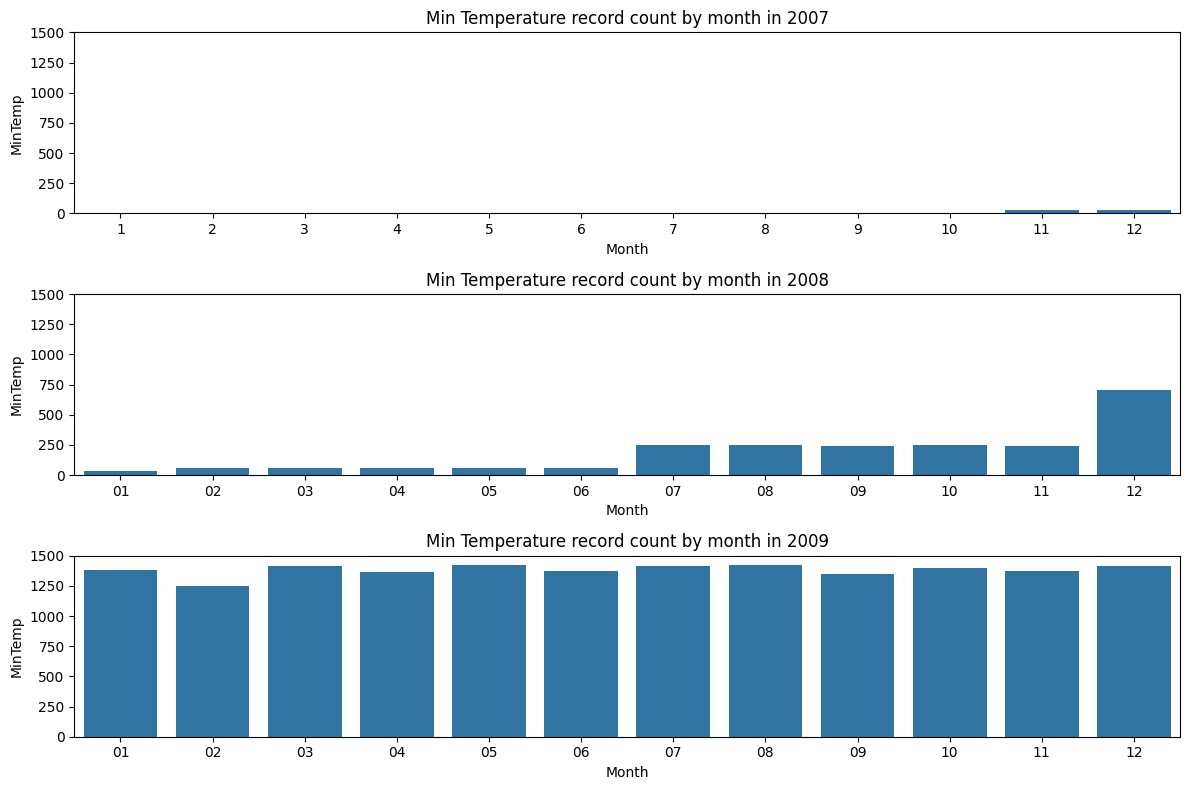

In [71]:
# create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

sns.barplot(data=missing_temp_by_month_2007, x='Month', y='MinTemp', order=list(range(1, 13)), ax=axes[0])
axes[0].set_title("Min Temperature record count by month in 2007")
axes[0].set_ylim(0, 1500)

sns.barplot(data=missing_temp_by_month_2008, x='Month', y='MinTemp', ax=axes[1])
axes[1].set_title("Min Temperature record count by month in 2008")
axes[1].set_ylim(0, 1500)

sns.barplot(data=missing_temp_by_month_2009, x='Month', y='MinTemp', ax=axes[2])
axes[2].set_title("Min Temperature record count by month in 2009")
axes[2].set_ylim(0, 1500)

plt.tight_layout()  # Avoid overlap

plt.show()

It is clearly visible how many records are missing in 2007 and 2008 in comparison to 2009 - I will not visualise remaining variables as numbers looks very similar. But I will keep that in mind - I might need to remove 2007 and 2008 data from my investigation at all.

To do:

explore mean, median, quartiles

draw histograms and boxplots

check variance and standard deviation

explore covariance and correlation

scatter plot